<a href="https://colab.research.google.com/github/Mayukhgits/Klinkenberg_Effect/blob/main/Klinkenberg_Effect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt

##Klinkenberg Effect
>It is often observed that permeability measured with air is consistently higher than with liquids due to gas slippage through pore walls. Unlike liquids, gases have a finite velocity at the grain surface, resulting in higher flow rates.

>As mean pressure decreases, the apparent gas permeability increases from the true liquid (absolute) permeability. This happens when the diameter of the capillary openings approach the mean free path of the gas. Lighter the gas, more easily it can slip resulting in higher gas permeability.















##Objective
>Our aim is to find the absolute permeability of the core sample , from only one gas permeabilty measurement at a given mean pressure (Pm).

###Governing Equations:

> $$ {k_{g}}  = {k_{l}} + \frac{c}{P_{m}} \:\:\:\:[Eq-1]$$

> $$ f(k_{l}) = 6.9(k_{l})^{0.64} + P_{m}(k_{l}-k_{g}) \:\:\:\:[Eq-2]
 $$

> $$ f'(k_{l}) = 4.416(k_{l})^{-0.36} + P_{m} \:\:\:\:[Eq-3]$$

>where $P_{m}$ = mean pressure (psi)

>$k_{g}$ = air permeability at pm (psi)

>$k_{l}$ = absolute permeability or 'k' (md)

                    



##Procedure:
>Absolute permeability ($k_{l}$) can be found by having gas permeability from a core sample at a mean pressure ($P_{m}$). This can be done by solving (Eq-2) for $f(k_{l})=0$.
> But since this is equation is non-linear , we take help of **Newton Raphson**'s iterative method. The proposed solution method can be
conveniently written as:
> $$k_{i+1}=k_{i} \:-\: \frac{f(k_{i})}{f'(k_{i})} $$

>where $k_{i}$ = initial guess of the absolute permeability, md

>$k_{i+1}$ = new permeability value to be used for the next iteration

>$i$ = iteration level

>$f(k_{i}$) = evaluated by using the assumed value of $k_{i}$

>$f'(k_{i}$) = first-derivative of Equation 4-47 as evaluated at $k_{i}$

>In this method, a random value of $k_{i}$ is assumed from which
>$f(k_{i})$ and
>$f'(k_{i})$ are calculated.
Then, the new iterative permeability $k_{i+1}$ is obtained from [Eq-2] and this is repeated until $f(k_{i})$ becomes 0 or value of
>$k_{i+1}$ converges (negligible change).


Enter gas_permeability (in md):  46.6
Enter mean_pressure (in psia): 2.152
Assume a value for absolute_permeability (in md): 23.66

Converged in 2 iterations.
Thus, the absolute permeability (at infinite mean pressure) is: 22.849002 md


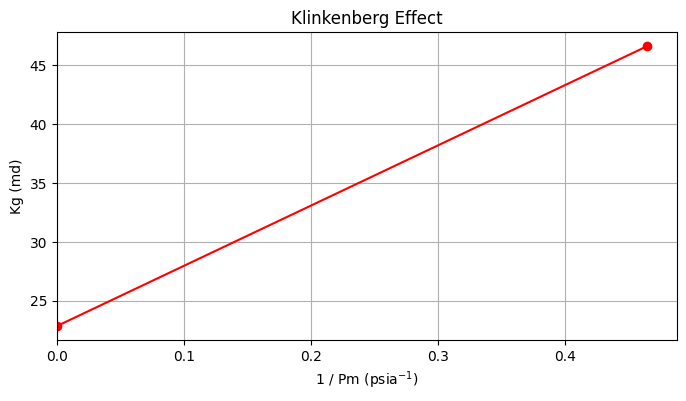

In [ ]:
import matplotlib.pyplot as plt

def klinkenberg():
    k_g = float(input('\nEnter gas_permeability (in md):  '))
    p_m = float(input('Enter mean_pressure (in psia): '))
    k_l = float(input('Assume a value for absolute_permeability (in md): '))

    iteration = 0
    max_iterations = 1000

    while abs(6.9 * (k_l)**0.64 + p_m * (k_l - k_g))>0.0001 and iteration<max_iterations: #function solves the equation until the change is very small(<0.0001), indicating convergence.
        f_kl = 6.9 * (k_l)**0.64 + p_m * (k_l - k_g)
        f_prime_kl = 4.416 * (k_l)**(-0.36) + p_m
        k_l = k_l - f_kl / f_prime_kl
        iteration += 1

    print(f"\nConverged in {iteration} iterations.") #Displays the number of iterations and the converged value of k_l.
    print(f"Thus, the absolute permeability (at infinite mean pressure) is: {k_l:.6f} md")

    x = [0, 1/p_m]
    y = [k_l, k_g]

    plt.figure(figsize=(8, 4))
    plt.plot(x, y, color='r', marker='o')
    plt.title('Klinkenberg Effect')
    plt.xlabel('1 / Pm ($\\mathrm{psia}^{-1}$)')

    plt.ylabel('Kg (md)')
    plt.xlim(left=0)
    plt.grid(True)
    plt.show()

klinkenberg()
